In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Estilos predeterminados de matplotlib

In [3]:
# Matplotlib utiliza estilos predeterminados para los colores y contenido de los graficos
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
# Vamos a seleccionar 'seaborn-colorblind' para utilizarlo en todos nuestros graficos
plt.style.use('seaborn-colorblind')

In [5]:
# Vamos a crear una base de datos fiticia para hacer algunos ejemplos
np.random.seed(123)

df = pd.DataFrame({'A': np.random.randn(365).cumsum(0), 
                   'B': np.random.randn(365).cumsum(0) + 20,
                   'C': np.random.randn(365).cumsum(0) - 20}, 
                  index=pd.date_range('1/1/2017', periods=365))
df.head()

,A,B,C
2017-01-01,-1.085631,20.059291,-20.230904
2017-01-02,-0.088285,21.803332,-16.659325
2017-01-03,0.194693,20.835588,-17.055481
2017-01-04,-1.311601,21.255156,-17.093802
2017-01-05,-1.890202,21.462083,-19.518638


<AxesSubplot:>

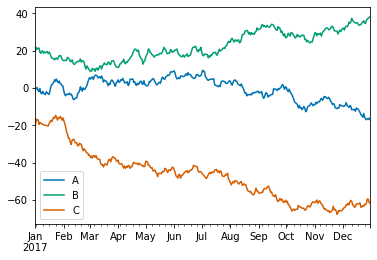

In [6]:
# Ahora hagamos un grafico de lineas
df.plot()

<AxesSubplot:xlabel='A', ylabel='B'>

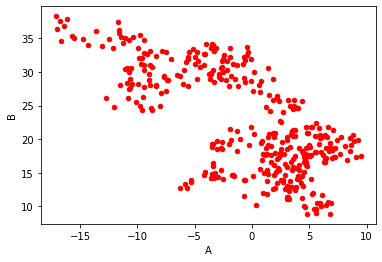

In [8]:
df.plot('A', 'B', kind = 'scatter', color = 'r')

You can also choose the plot kind by using the DataFrame.plot.kind methods instead of providing the kind keyword argument.

kind :

* 'line' : line plot (default)
* 'bar' : vertical bar plot
* 'barh' : horizontal bar plot
* 'hist' : histogram
* 'box' : boxplot
* 'kde' : Kernel Density Estimation plot
* 'density' : same as 'kde'
* 'area' : area plot
* 'pie' : pie plot
* 'scatter' : scatter plot
* 'hexbin' : hexbin plot

Ahora intentemos esto y creemos algo un poco más complejo. Esta vez queremos hacer un diagrama de dispersión con puntos que varían en color y tamaño.

<AxesSubplot:xlabel='A', ylabel='C'>

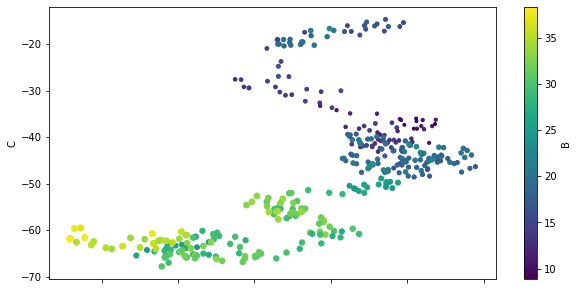

In [11]:
df.plot.scatter('A', 'C', c='B', s=df['B'], colormap = 'viridis', figsize=(10,5))

Aquí podemos ver las columnas A y C trazadas una contra la otra con el cambio de tamaño y color según los valores de la columna B

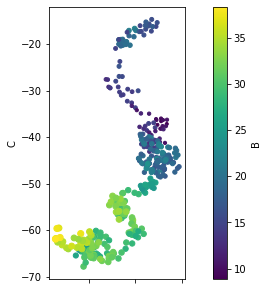

In [13]:
# Establecer la relación de aspecto igual ax.set_aspect('equal') permite al espectador ver fácilmente que el rango de 
# la serie A es mucho más pequeño que el de la serie C.
ax = df.plot.scatter('A', 'C', c='B', s=df['B'], colormap = 'viridis', figsize=(10,5))
ax.set_aspect('equal')

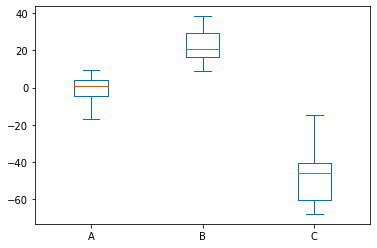

In [15]:
df.plot.box();

<AxesSubplot:ylabel='Frequency'>

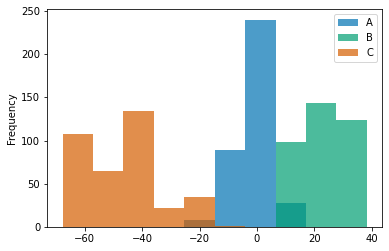

In [16]:
df.plot.hist(alpha=0.7)

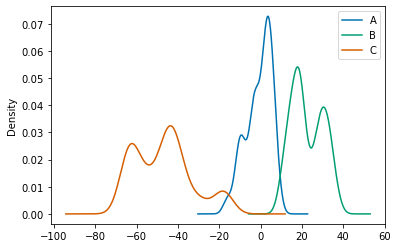

In [17]:
df.plot.kde();

### pandas.tools.plotting

In [18]:
iris = pd.read_csv('iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


### Scatter matrix - Dispersion e histogramas de todas las variables


La matriz de dispersión crea diagramas de dispersión entre las diferentes variables e histogramas a lo largo de las diagonales. Esto nos permite ver rápidamente algunos de los patrones más obvios en el conjunto de datos.

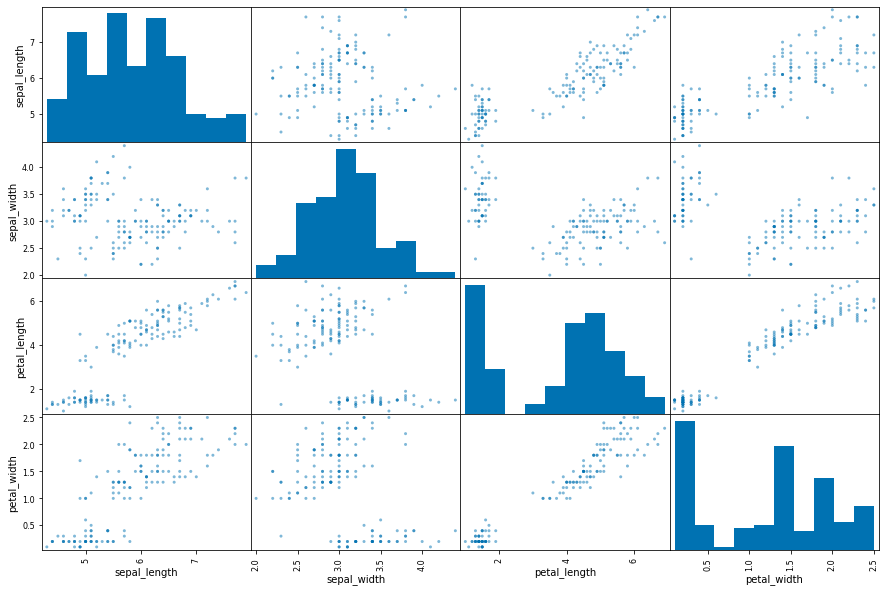

In [21]:
pd.plotting.scatter_matrix(iris, figsize=(15,10));

<AxesSubplot:>

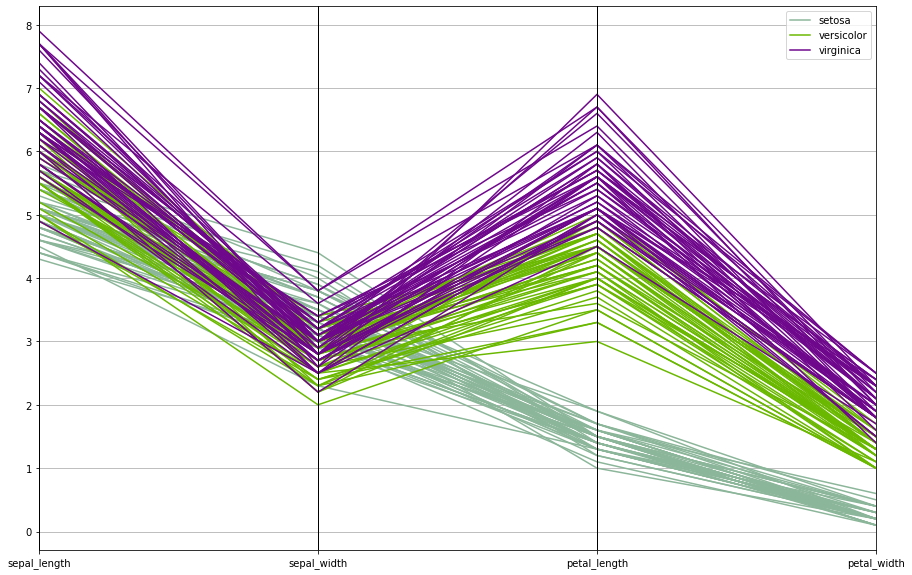

In [24]:
plt.figure(figsize=(15,10))
pd.plotting.parallel_coordinates(iris, 'species')

Los gráficos de coordenadas paralelas son una forma común de visualizar datos multivariados de alta dimensión.

Cada variable en el conjunto de datos corresponde a una línea vertical paralela igualmente espaciada. Luego, los valores de cada variable se conectan mediante líneas entre cada observación individual.

Colorear las líneas por clase, en este ejemplo la especie de flor, permite al espectador ver más fácilmente cualquier patrón o agrupación.

Por ejemplo, al observar nuestro conjunto de datos de iris, **podemos ver que la longitud y el ancho de los pétalos son dos variables que dividen las diferentes especies con bastante claridad**. Con iris virginica que tiene los pétalos más largos y anchos. Y el iris setosa que tiene los pétalos más cortos y angostos. 